# Swedes without any close friends

This notebook explores and visualizes the proportion of Swedes stating they have no close friends.

- Date: 2019-04-04
- Source: [SCB: Undersökningarna av levnadsförhållanden](http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__LE__LE0101__LE0101R/LE0101R07/?rxid=710c09ba-1e21-4bb5-9619-441e5ba97d8b)

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from src.plot import ds_plot

%config InlineBackend.figure_format = 'retina'

plt.style.use('../assets/datastory.mpltstyle')

In [2]:
df = pd.read_csv('../data/raw/friends.csv', encoding='latin1', skiprows=1)

### Transform

In [3]:
df = df.drop('indikator', axis=1)

df.columns = ['age', 'sex', 'percent_2008', 'percent_2016',
              'error_2008', 'error_2016']

men = df[df['sex'] == 'män']
women = df[df['sex'] == 'kvinnor']

### Plot

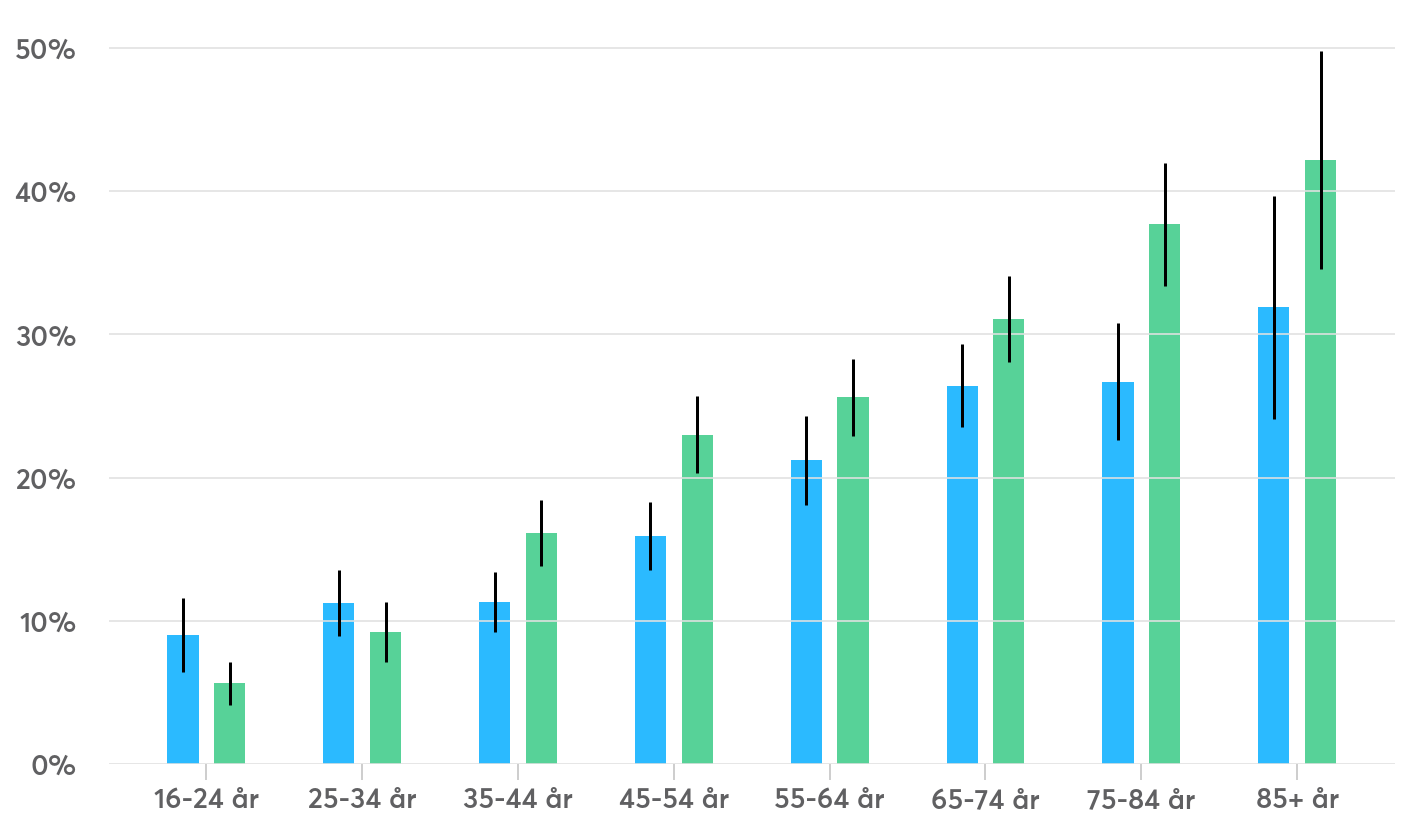

In [4]:
# Men. Grouped bar chart with error bars

fig, ax = ds_plot()

ax.bar(men.age.index - 0.3, men.percent_2016, 0.4, color='#2bbaff', yerr=men.error_2016)
ax.bar(men.age.index + 0.3, men.percent_2008, 0.4, color='#57d298', yerr=men.error_2008)

ax.set_xticks(men.age.index)
ax.set_xticklabels(men.age.values)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax.set_xlabel('')

plt.gcf().set_facecolor('#ffffff');

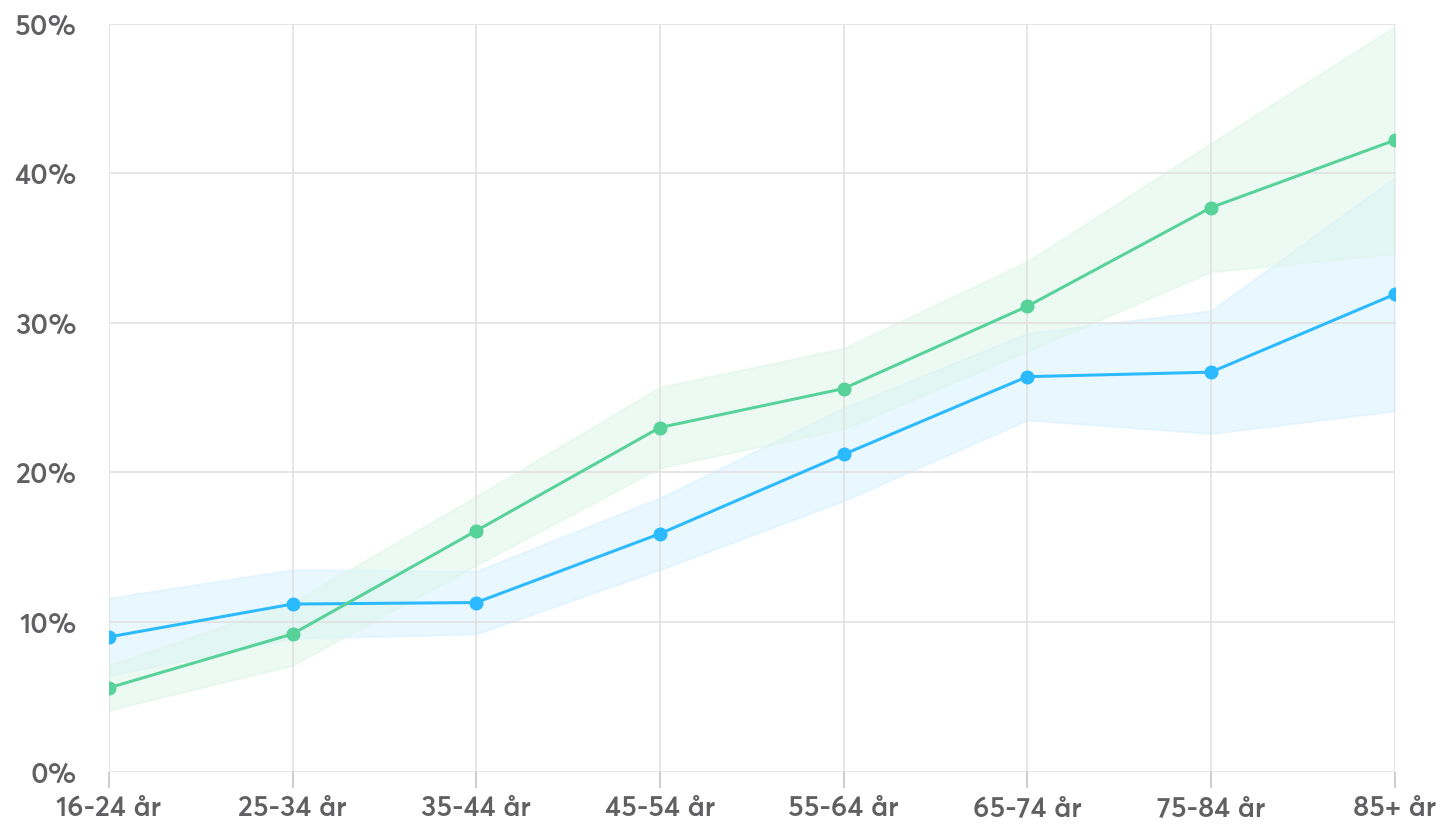

In [5]:
# Men. Line chart with confidence intervals

fig, ax = ds_plot()

men.plot(x='age', y='percent_2016', ylim=(0, 50), ax=ax, label='Män 2017', color='#2bbaff') #blue
ax.plot(men.age, men.percent_2016, 'o', color='#2bbaff')
men.plot(x='age', y='percent_2008', ax=ax, label='Män 2009', color='#57d298') # green
ax.plot(men.age, men.percent_2008, 'o', color='#57d298')

ax.fill_between(men.age,
                men.percent_2016 + men.error_2016,
                men.percent_2016 - men.error_2016,
                color='#d5f1ff', alpha=0.5)
ax.fill_between(men.age,
                men.percent_2008 + men.error_2008,
                men.percent_2008 - men.error_2008,
                color='#ddf6ea', alpha=0.5)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax.set_xlabel('')
ax.legend().remove()

fig.set_facecolor('#ffffff')
fig.savefig('../charts/2019-04-04-no-friends.png')

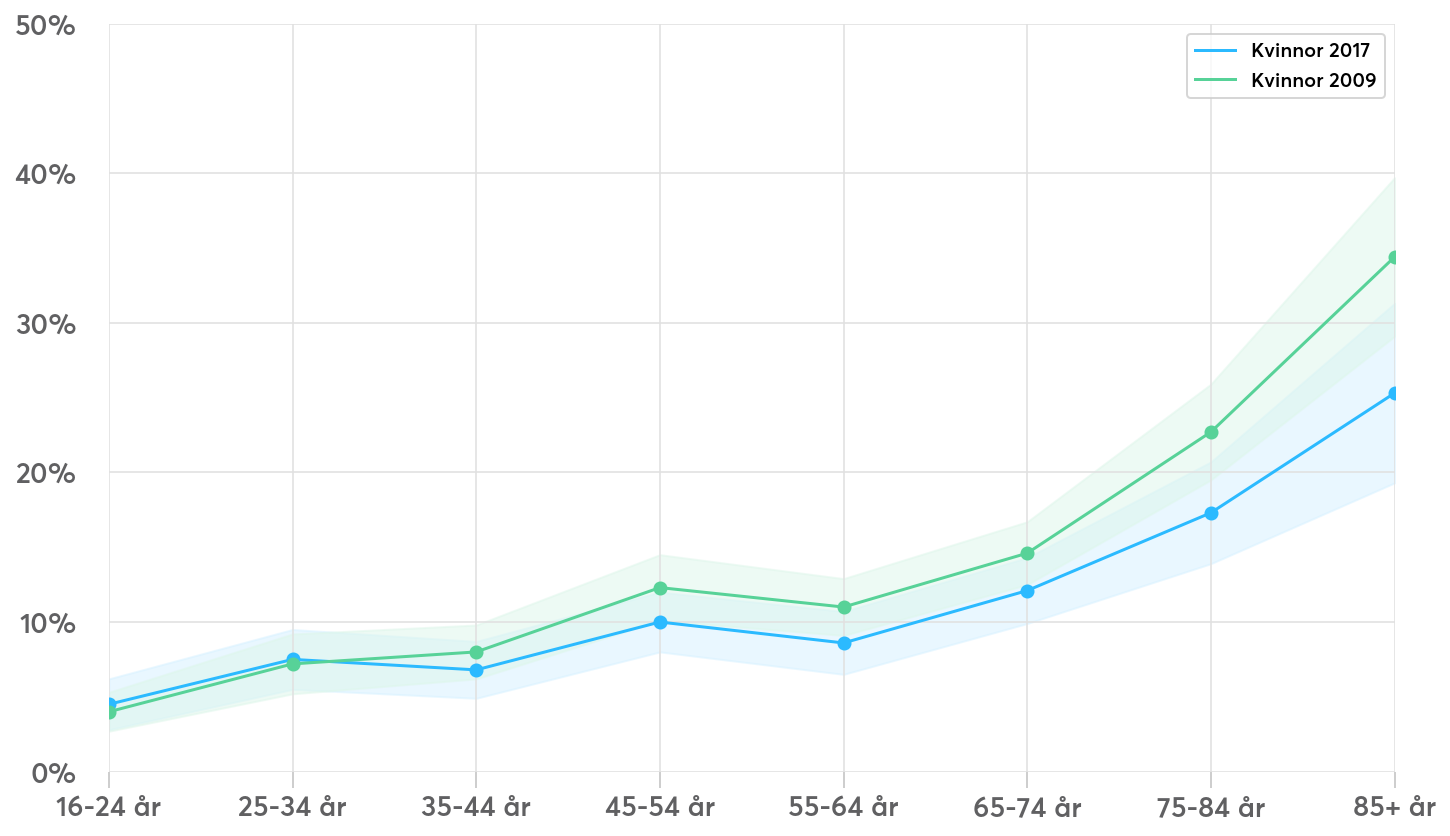

In [6]:
# Women. Line chart with confidence intervals

fig, ax = ds_plot()

women.plot(x='age', y='percent_2016', ylim=(0, 50), ax=ax, label='Kvinnor 2017', color='#2bbaff')
ax.plot(women.age, women.percent_2016, 'o', color='#2bbaff')
women.plot(x='age', y='percent_2008', ax=ax, label='Kvinnor 2009', color='#57d298')
ax.plot(women.age, women.percent_2008, 'o', color='#57d298')

ax.fill_between(women.age,
                women.percent_2016 + women.error_2016,
                women.percent_2016 - women.error_2016,
                color='#d5f1ff', alpha=0.5)
ax.fill_between(women.age,
                women.percent_2008 + women.error_2008,
                women.percent_2008 - women.error_2008,
                color='#ddf6ea', alpha=0.5)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax.set_xlabel('')

plt.gcf().set_facecolor('#ffffff');